# Importing Dependencies
---

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Importing Datasets
---

[Geopandas documentation](https://geopandas.org/en/stable/gallery/plotting_basemap_background.html) hints at [geodatasets](https://geodatasets.readthedocs.io/en/latest/) telling us it is possible to check available arguments for `.get_path` can be done via
```python
geodatasets.data.flatten().keys()
```

In [2]:
# Loading world data for the basemap
world_path = geodatasets.get_path("naturalearth.land")
world = gpd.read_file(world_path)

# World Cities
---
Found at (https://www.kaggle.com/datasets/juanmah/world-cities)

In [3]:
wc_df = pd.read_csv("data/worldcities.csv")

In [4]:
wc_df.head(3)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604


In [5]:
wc_df.columns

Index(['city', 'city_ascii', 'lat', 'lng', 'country', 'iso2', 'iso3',
       'admin_name', 'capital', 'population', 'id'],
      dtype='object')

In [6]:
len(wc_df)

47868

In [7]:
wc_geometry = [Point(xy) for xy in zip(wc_df["lng"], wc_df["lat"])]
wc_gdf = gpd.GeoDataFrame(wc_df, geometry=wc_geometry)

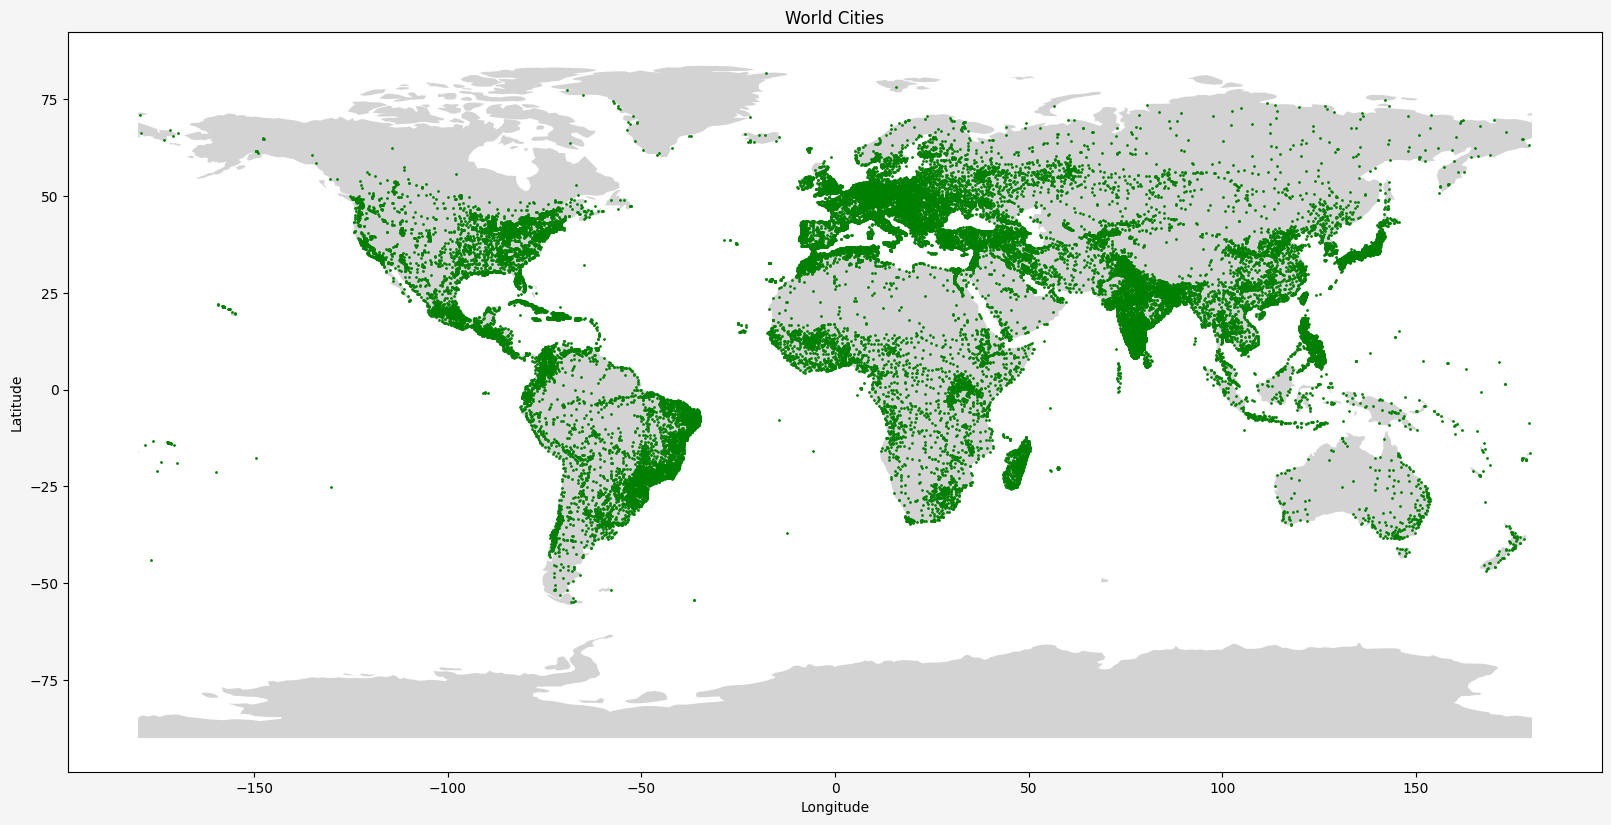

In [8]:
# Creating the figure and axes with Matplotlib
fig, ax = plt.subplots(figsize=(16, 9), facecolor="whitesmoke", layout="constrained")

# Plotting the world basemap on the axes
world.plot(ax=ax, color="lightgray")

# Plotting gdf
wc_gdf.plot(ax=ax, marker="o", color="green", markersize=1)

# Adding titles, labels, etc...
ax.set_title("World Cities")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.savefig("world_wc.png")
plt.show()

# Global Power Plants 
---
Found at (https://www.kaggle.com/datasets/ramjasmaurya/global-powerplants)

In [9]:
pp_df = pd.read_csv("data/global_power_plants.csv")

In [10]:
pp_df.head(3)

,country code,country_long,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel2,other_fuel3,start date,owner of plant,generation_gwh_2021,geolocation_source,estimated_generation_gwh_2021
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.119,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,GEODB,123.77
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.795,Solar,NaN,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,18.43
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.792,Solar,NaN,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,18.64


In [11]:
pp_df.columns

Index(['country code', 'country_long', 'name of powerplant', 'capacity in MW',
       'latitude', 'longitude', 'primary_fuel', 'secondary fuel',
       'other_fuel2', 'other_fuel3', 'start date', 'owner of plant',
       'generation_gwh_2021', 'geolocation_source',
       'estimated_generation_gwh_2021'],
      dtype='object')

In [12]:
len(pp_df)

34936

In [13]:
pp_geometry = [Point(xy) for xy in zip(pp_df["longitude"], pp_df["latitude"])]
pp_gdf = gpd.GeoDataFrame(pp_df, geometry=pp_geometry)

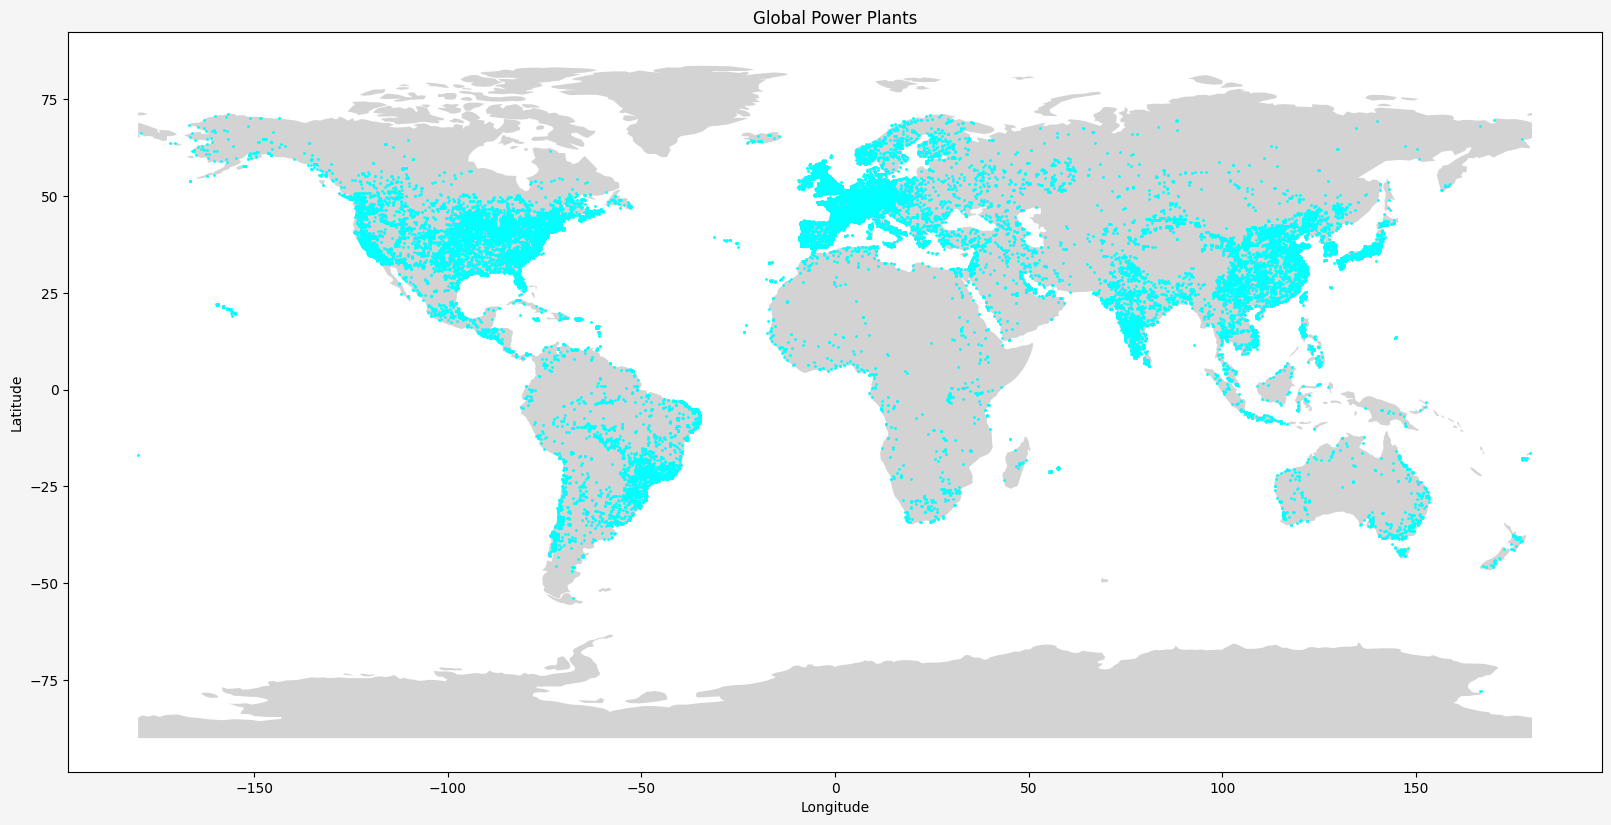

In [14]:
# Creating the figure and axes with Matplotlib
fig, ax = plt.subplots(figsize=(16, 9), facecolor="whitesmoke", layout="constrained")

# Plotting the world basemap on the axes
world.plot(ax=ax, color="lightgray")

# Plotting gdf
pp_gdf.plot(ax=ax, marker="o", color="cyan", markersize=1)

# Adding titles, labels, etc...
ax.set_title("Global Power Plants")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.savefig("world_pp.png")
plt.show()

# Meteorite Landings
---
Found at (https://www.kaggle.com/datasets/nasa/meteorite-landings)

In [15]:
ml_df = pd.read_csv("data/meteorite-landings.csv")

In [16]:
ml_df.head(3)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"


In [17]:
ml_df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

In [18]:
len(ml_df)

45716

In [19]:
ml_df = ml_df[ml_df["reclong"] <= 200]

In [20]:
ml_geometry = [Point(xy) for xy in zip(ml_df["reclong"], ml_df["reclat"])]
ml_gdf = gpd.GeoDataFrame(ml_df, geometry=ml_geometry)

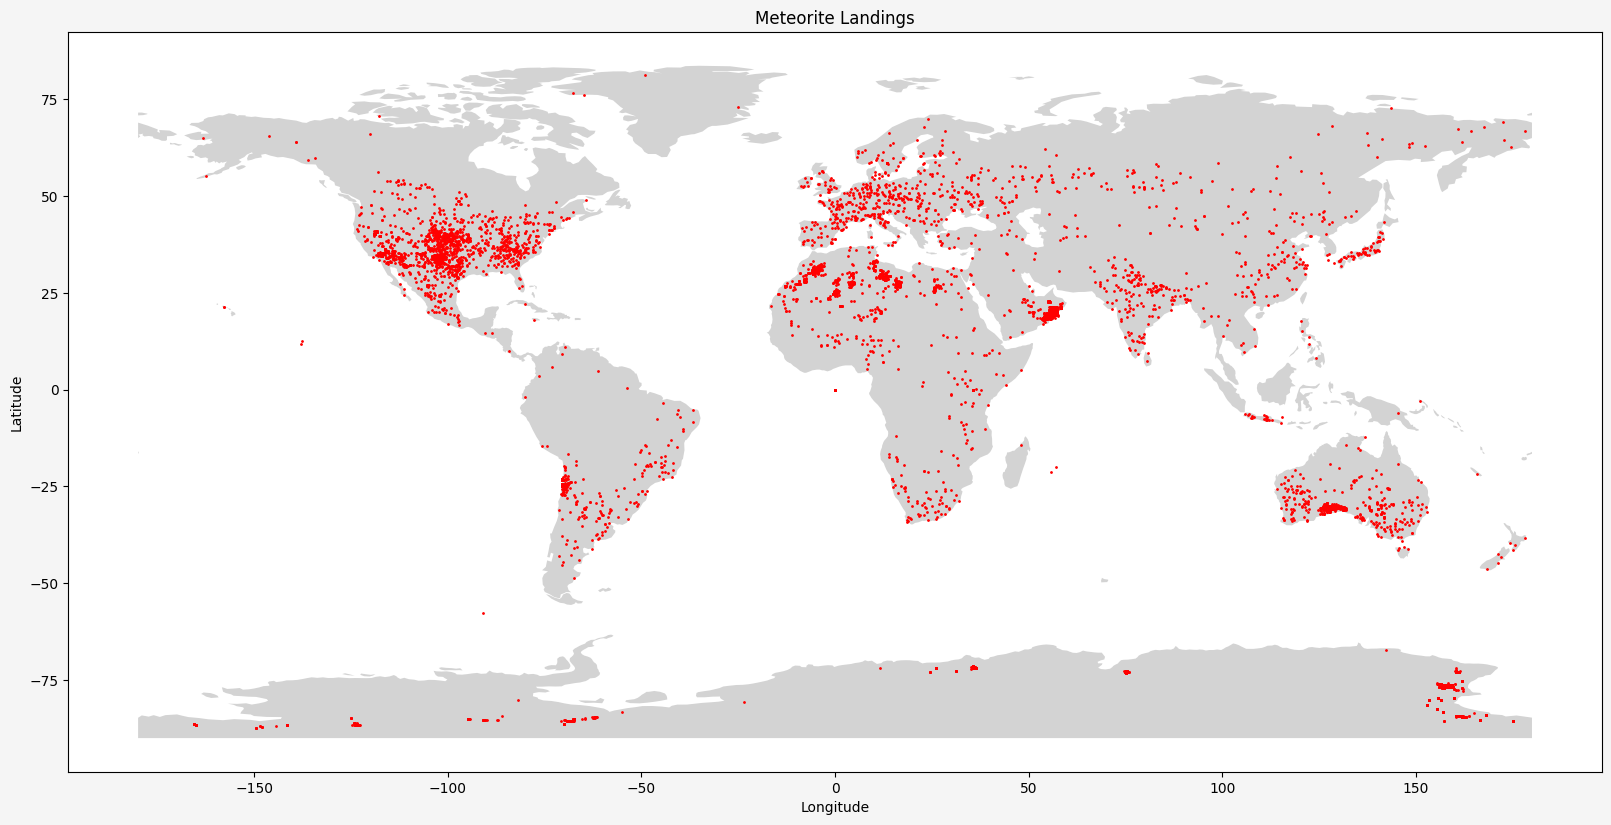

In [21]:
# Creating the figure and axes with Matplotlib
fig, ax = plt.subplots(figsize=(16, 9), facecolor="whitesmoke", layout="constrained")

# Plotting the world basemap on the axes
world.plot(ax=ax, color="lightgray")

# Plotting gdf
ml_gdf.plot(ax=ax, marker="o", color="red", markersize=1)

# Adding titles, labels, etc...
ax.set_title("Meteorite Landings")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.savefig("world_ml.png")
plt.show()

# Earthquakes (a)
---
Found at (https://www.kaggle.com/datasets/mustafakeser4/earthquakes-2023-global)

In [22]:
eq_a_df = pd.read_csv("data/earthquakes_2023_global.csv")

In [23]:
eq_a_df.head(3)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr


In [24]:
eq_a_df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [25]:
len(eq_a_df)

26642

In [26]:
eq_a_geometry = [Point(xy) for xy in zip(eq_a_df["longitude"], eq_a_df["latitude"])]
eq_a_gdf = gpd.GeoDataFrame(eq_a_df, geometry=eq_a_geometry)

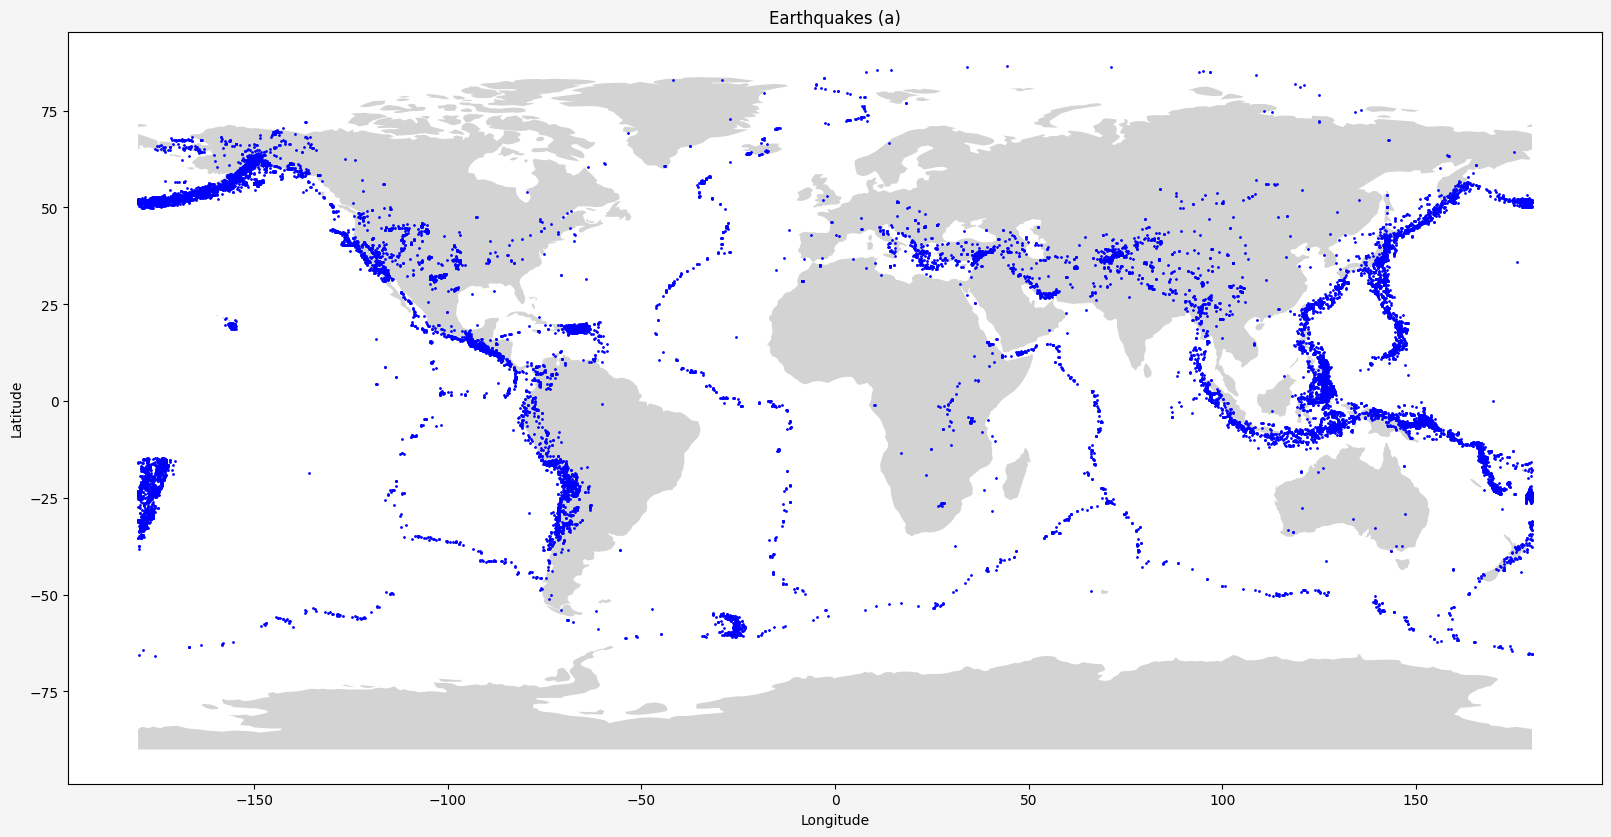

In [27]:
# Creating the figure and axes with Matplotlib
fig, ax = plt.subplots(figsize=(16, 9), facecolor="whitesmoke", layout="constrained")

# Plotting the world basemap on the axes
world.plot(ax=ax, color="lightgray")

# Plotting gdf
eq_a_gdf.plot(ax=ax, marker="o", color="blue", markersize=1)

# Adding titles, labels, etc...
ax.set_title("Earthquakes (a)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.savefig("world_eq_a.png")
plt.show()

# Earthquakes (b)
---
Found at (https://www.kaggle.com/datasets/joebeachcapital/earthquakes)

In [28]:
eq_b_df = pd.read_csv("data/significant-earthquake-database.csv", sep=";")

In [29]:
eq_b_df.head(3)

,ID Earthquake,Flag Tsunami,Year,Month,Day,Focal Depth,EQ Primary,Mw Magnitude,Ms Magnitude,Mb Magnitude,...,Total Effects : Missing Description,Total Effects : Injuries,Total Effects : Injuries Description,Total Effects : Damages in million Dollars,Total Effects : Damage Description,Total Effects : Houses Destroyed,Total Effects : Houses Destroyed Description,Total Effects : Houses Damaged,Total Effects : Houses Damaged Description,Coordinates
0,78,NaN,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"41.2, 19.3"
1,84,Tsunami,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,SEVERE (~>$5 to $24 million),NaN,NaN,NaN,NaN,"40.3, 26.5"
2,9989,Tsunami,346,NaN,NaN,NaN,6.8,NaN,6.8,NaN,...,NaN,NaN,NaN,NaN,MODERATE (~$1 to $5 million),NaN,Many (~101 to 1000 houses),NaN,NaN,"41.4, 19.4"


In [30]:
eq_b_df.columns

Index(['ID Earthquake', 'Flag Tsunami', 'Year', 'Month', 'Day', 'Focal Depth',
       'EQ Primary', 'Mw Magnitude', 'Ms Magnitude', 'Mb Magnitude',
       'Ml Magnitude', 'MFA Magnitude', 'Unknown Magnitude', 'Intensity',
       'Country', 'State', 'Location name', 'Region code',
       'Earthquake : Deaths', 'Earthquake : Deaths Description',
       'Earthquake : Missing', 'Earthquake : Missing Description',
       'Earthquake : Injuries', 'Earthquake : Injuries Description',
       'Earthquake : Damage (in M$)', 'Earthquake : Damage Description',
       'Earthquakes : Houses destroyed',
       'Earthquakes : Houses destroyed Description',
       'Earthquakes : Houses damaged',
       'Earthquakes : Houses damaged Description', 'Total Effects : Deaths',
       'Total Effects : Deaths Description', 'Total Effects : Missing',
       'Total Effects : Missing Description', 'Total Effects : Injuries',
       'Total Effects : Injuries Description',
       'Total Effects : Damages in million

In [31]:
len(eq_b_df)

6208

In [32]:
eq_b_df[["latitude", "longitude"]] = eq_b_df["Coordinates"].str.split(", ", expand=True)

In [33]:
eq_b_geometry = [Point(xy) for xy in zip(eq_b_df["longitude"], eq_b_df["latitude"])]
eq_b_gdf = gpd.GeoDataFrame(eq_b_df, geometry=eq_b_geometry)

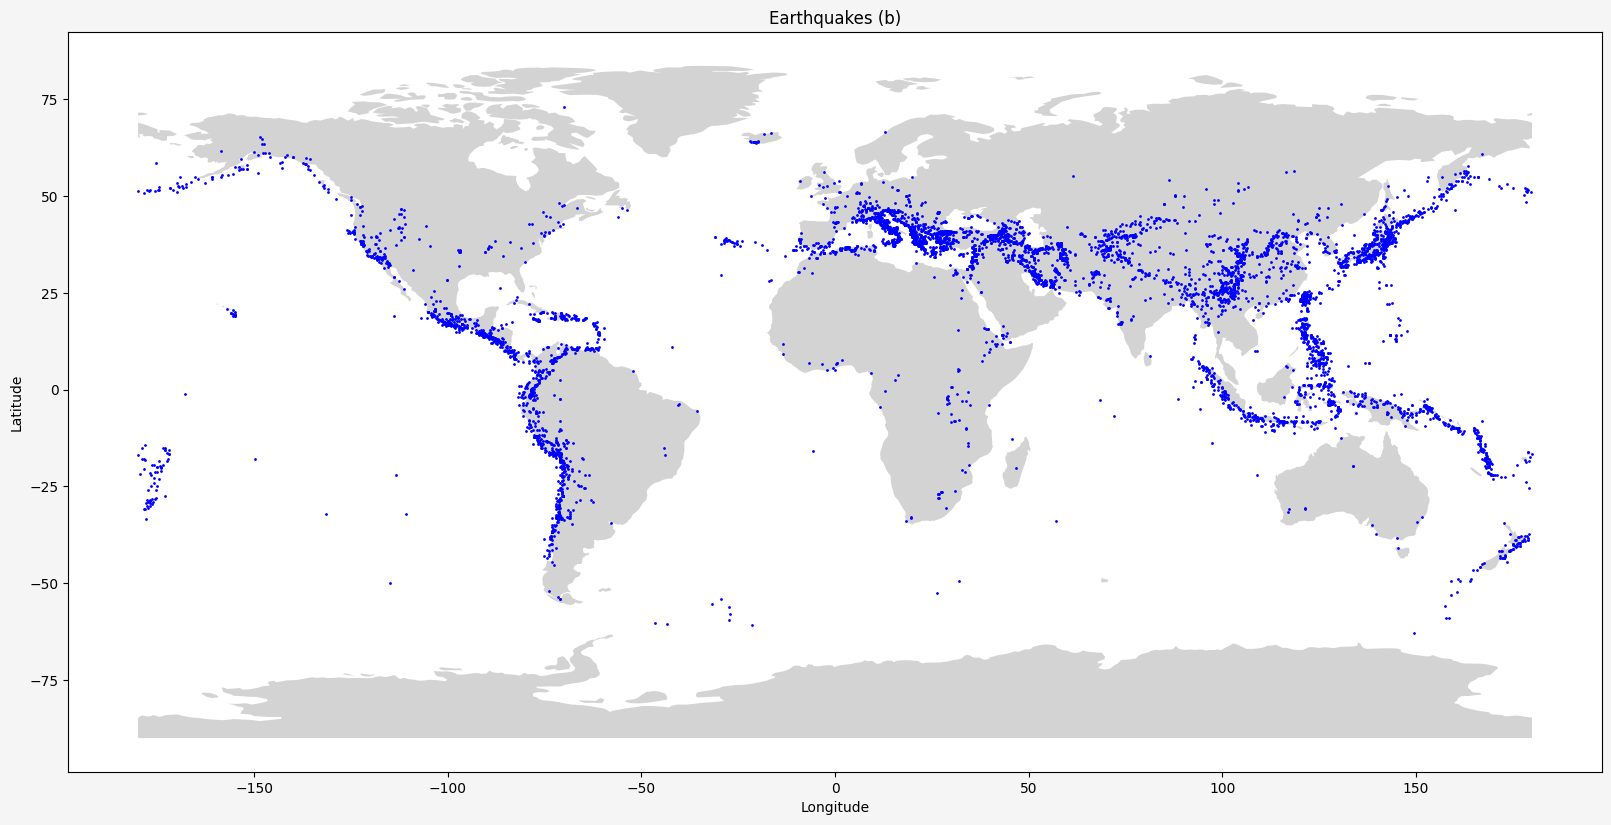

In [34]:
# Creating the figure and axes with Matplotlib
fig, ax = plt.subplots(figsize=(16, 9), facecolor="whitesmoke", layout="constrained")

# Plotting the world basemap on the axes
world.plot(ax=ax, color="lightgray")

# Plotting gdf
eq_b_gdf.plot(ax=ax, marker="o", color="blue", markersize=1)

# Adding titles, labels, etc...
ax.set_title("Earthquakes (b)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.savefig("world_eq_b.png")
plt.show()

# Earthquakes (c)
---
Found at (https://www.kaggle.com/datasets/stealthtechnologies/earthquakes-dataset)

In [35]:
eq_c_df = pd.read_csv("data/earthquakes_data.csv")

In [36]:
eq_c_df.head(3)

,Date,Time (utc),Region,Magnitude,Depth (km),Latitude,Longitude,Mode,Map
0,23/06/2024,04:51:49,"Mindanao, Philippine",4.8,342,8.01 N,125.20 E,A,-
1,23/06/2024,03:58:03,Near Coast of Venezuela,5.9,105,10.80 N,62.65 W,A,-
2,23/06/2024,03:12:08,"Near East Coast of Honshu, japan",5.0,55,37.16 N,141.09 E,A,-


In [37]:
eq_c_df.columns

Index(['Date', 'Time (utc)', 'Region', 'Magnitude', 'Depth (km)', 'Latitude',
       'Longitude', 'Mode', 'Map'],
      dtype='object')

In [38]:
len(eq_c_df)

14726

In [39]:
def func(x):
    x = x.lower().replace(" ", "").replace("..", "")
    if x.endswith("n"):
        x = x.rstrip("n")
    elif x.endswith("e"):
        x = x.rstrip("e")
    elif x.endswith("s"):
        x = "-" + x.rstrip("s")
    elif x.endswith("w"):
        x = "-" + x.rstrip("w")

    try:
        return float(x)
    except Exception:
        return None

In [40]:
eq_c_df["longitude"] = eq_c_df["Longitude"].apply(lambda x: func(x))

In [41]:
eq_c_df["latitude"] = eq_c_df["Latitude"].apply(lambda x: func(x))

In [42]:
eq_c_df.dropna(subset=["latitude", "longitude"], inplace=True)

In [43]:
eq_c_df = eq_c_df[ (-90 <= eq_c_df["latitude"]) & ( eq_c_df["latitude"] <= 90) ]

In [44]:
eq_c_df = eq_c_df[ (-160 <= eq_c_df["longitude"]) & ( eq_c_df["longitude"] <= 160) ]

In [45]:
eq_c_df.dtypes

Date           object
Time (utc)     object
Region         object
Magnitude     float64
Depth (km)      int64
Latitude       object
Longitude      object
Mode           object
Map            object
longitude     float64
latitude      float64
dtype: object

In [46]:
eq_c_geometry = [Point(xy) for xy in zip(eq_c_df["longitude"], eq_c_df["latitude"])]
eq_c_gdf = gpd.GeoDataFrame(eq_c_df, geometry=eq_c_geometry)

In [47]:
len(eq_c_df)

13439

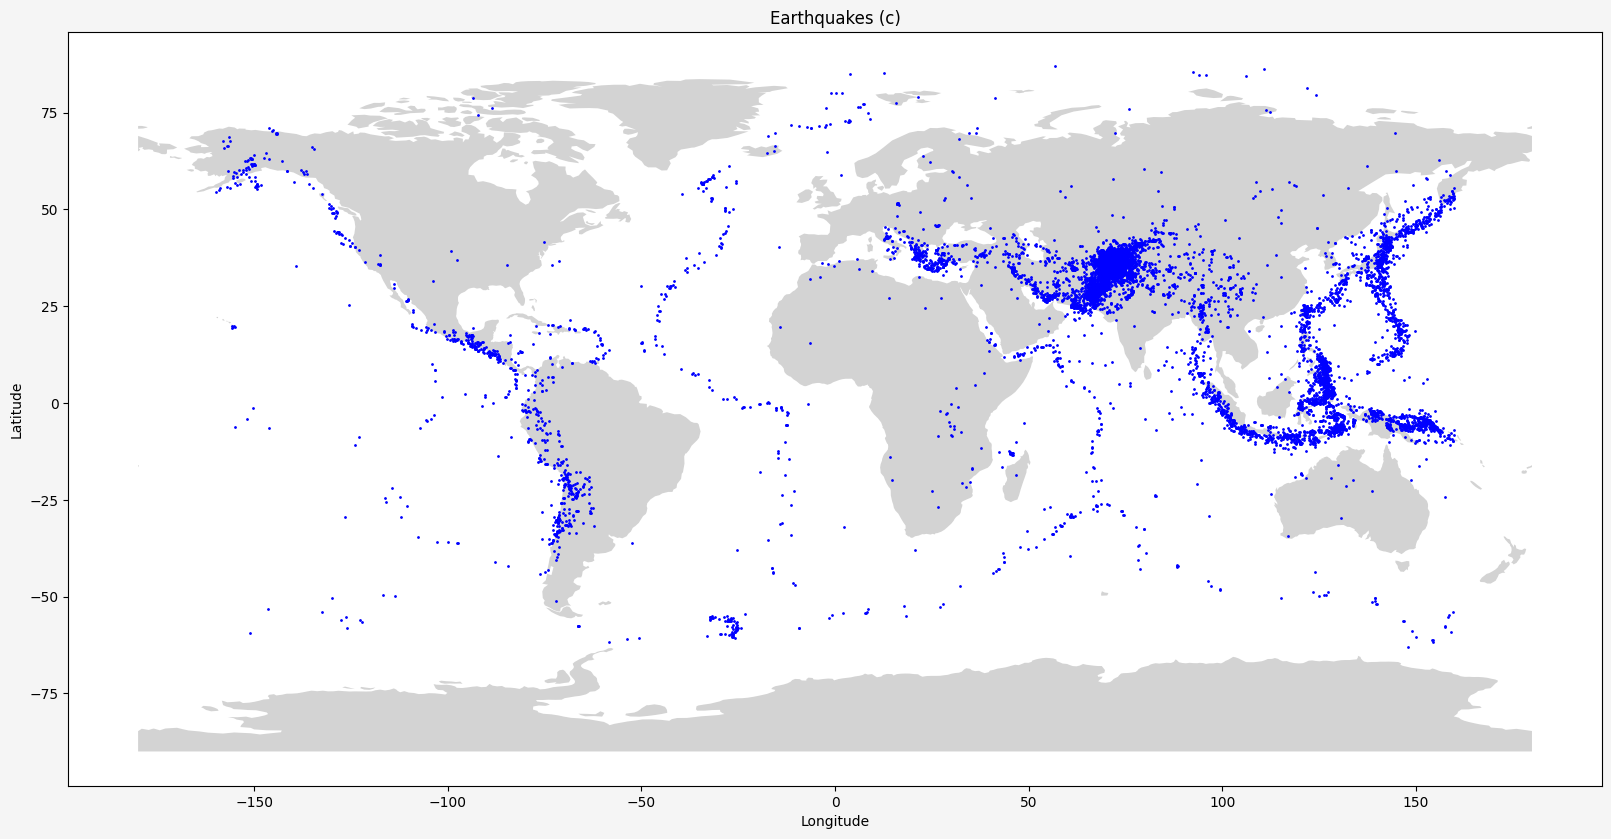

In [48]:
# Creating the figure and axes with Matplotlib
fig, ax = plt.subplots(figsize=(16, 9), facecolor="whitesmoke", layout="constrained")

# Plotting the world basemap on the axes
world.plot(ax=ax, color="lightgray")

# Plotting gdf
eq_c_gdf.plot(ax=ax, marker="o", color="blue", markersize=1)

# Adding titles, labels, etc...
ax.set_title("Earthquakes (c)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.savefig("world_eq_c.png")
plt.show()

# Plotting Geolocations
---

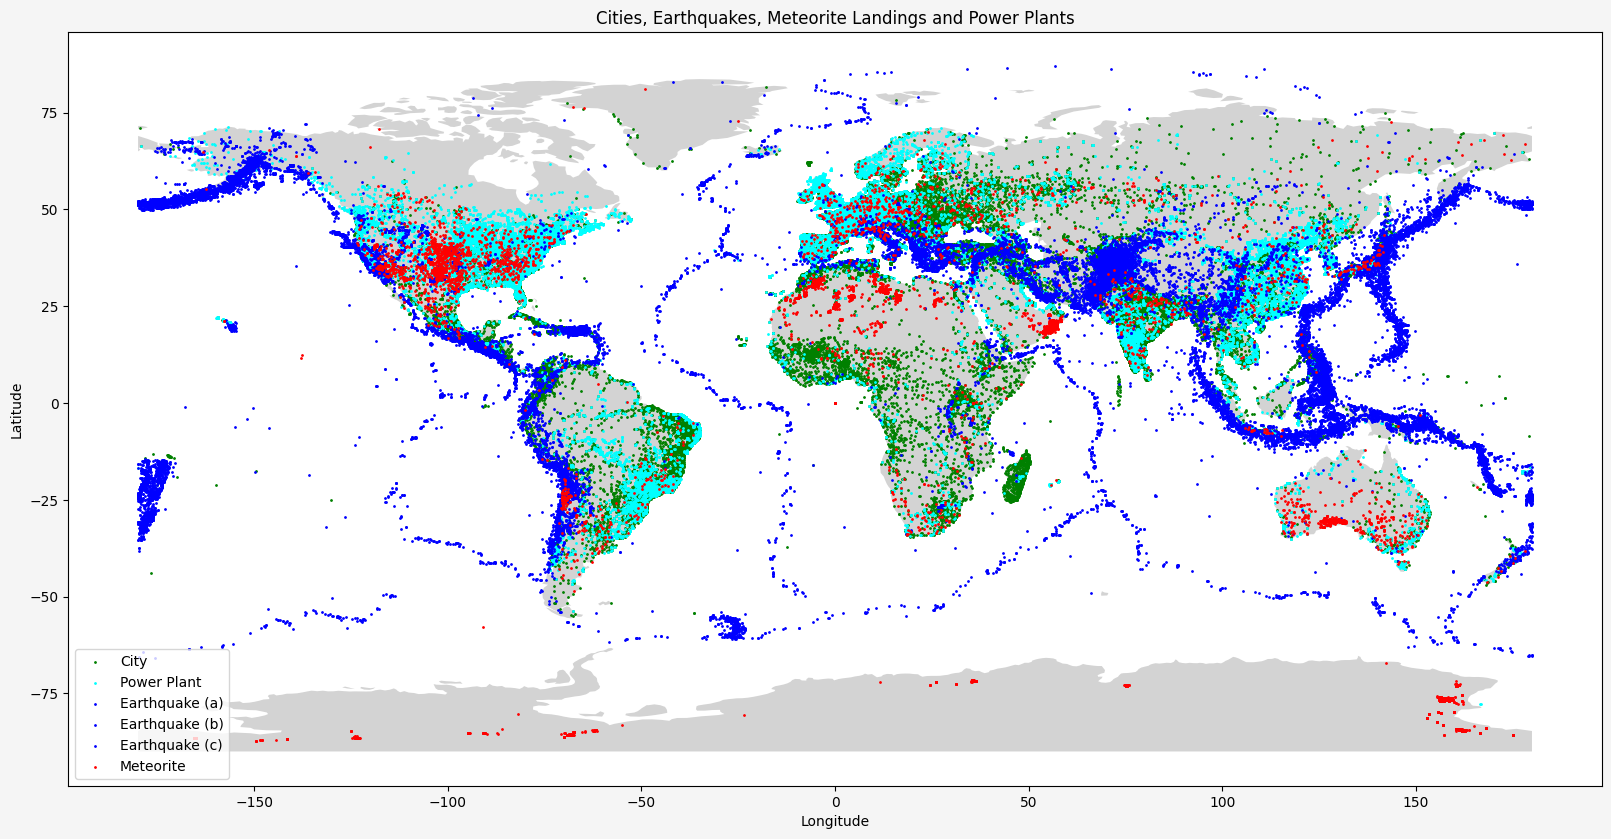

In [49]:
# Creating the figure and axes with Matplotlib
fig, ax = plt.subplots(figsize=(16, 9), facecolor="whitesmoke", layout="constrained")

# Plotting the world basemap on the axes
world.plot(ax=ax, color="lightgray")

# Plotting gdf
wc_gdf.plot(ax=ax, marker="o", color="green", markersize=1, label="City")
pp_gdf.plot(ax=ax, marker="o", color="cyan", markersize=1, label="Power Plant")
eq_a_gdf.plot(ax=ax, marker="o", color="blue", markersize=1, label="Earthquake (a)")
eq_b_gdf.plot(ax=ax, marker="o", color="blue", markersize=1, label="Earthquake (b)")
eq_c_gdf.plot(ax=ax, marker="o", color="blue", markersize=1, label="Earthquake (c)")
ml_gdf.plot(ax=ax, marker="o", color="red", markersize=1, label="Meteorite")

# Adding titles, labels, etc...
ax.set_title("Cities, Earthquakes, Meteorite Landings and Power Plants")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

ax.legend(loc='lower left')

# Show the plot
plt.savefig("world_overlap.png")
plt.show()

In [50]:
# Section yet to be written...